In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images_flat = train_images.reshape(-1)

mean = np.mean(train_images_flat)
std = np.std(train_images_flat)

print(f"Mean: {mean}, Standard Deviation: {std}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Mean: 33.318421449829934, Standard Deviation: 78.56748998339798


In [3]:
# Normlization techniques
#min-max scaling(range[0,1])
def min_max_scaling(image):
    return (image - np.min(image)) / (np.max(image) - np.min(image))

In [4]:
#Z-score pixelization(standarlizing pixels)
def z_score_normalization(image):
    return (image - mean) / std


In [5]:
#rescaling[-1,1]
def rescale_minus_one_to_one(image):
    return (image / 127.5) - 1


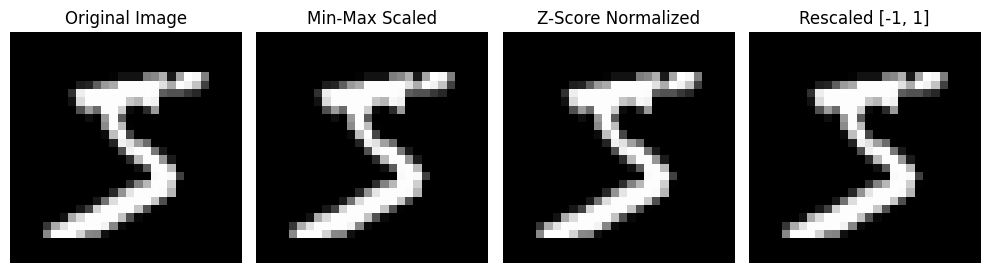

In [6]:
#visualization

sample_image = train_images[0]


min_max_image = min_max_scaling(sample_image)
z_score_image = z_score_normalization(sample_image)
rescaled_image = rescale_minus_one_to_one(sample_image)


plt.figure(figsize=(10, 6))

titles = ["Original Image", "Min-Max Scaled", "Z-Score Normalized", "Rescaled [-1, 1]"]
images = [sample_image, min_max_image, z_score_image, rescaled_image]

for i, (title, img) in enumerate(zip(titles, images)):
    plt.subplot(1, 4, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [7]:
#Task-2
#importing libraries and loading the data
import tensorflow as tf
import matplotlib.pyplot as plt


(train_images, train_labels), _ = tf.keras.datasets.mnist.load_data()
sample_image = train_images[0]
sample_image = tf.expand_dims(sample_image, axis=-1)


In [8]:
 #Defining augumentation functions
 #Random Rotation
def random_rotation(image):
    return tf.keras.preprocessing.image.random_rotation(image.numpy(), 30)
# Random Zoom
def random_zoom(image):
    zoom_factor = 0.8
    return tf.keras.preprocessing.image.random_zoom(image.numpy(), (zoom_factor, zoom_factor))
    # Random Flip
def random_flip(image):
    return tf.image.random_flip_left_right(image)
#Random Brightness

def random_brightness(image):
    return tf.image.adjust_brightness(image, delta=0.2)
#Random Shear
#TensorFlow does not directly support shear transformations, so this requires a custom function:


import numpy as np
from tensorflow.keras.preprocessing.image import apply_affine_transform

def random_shear(image):
    shear = 20  # Degrees
    return apply_affine_transform(image.numpy(), shear=shear)


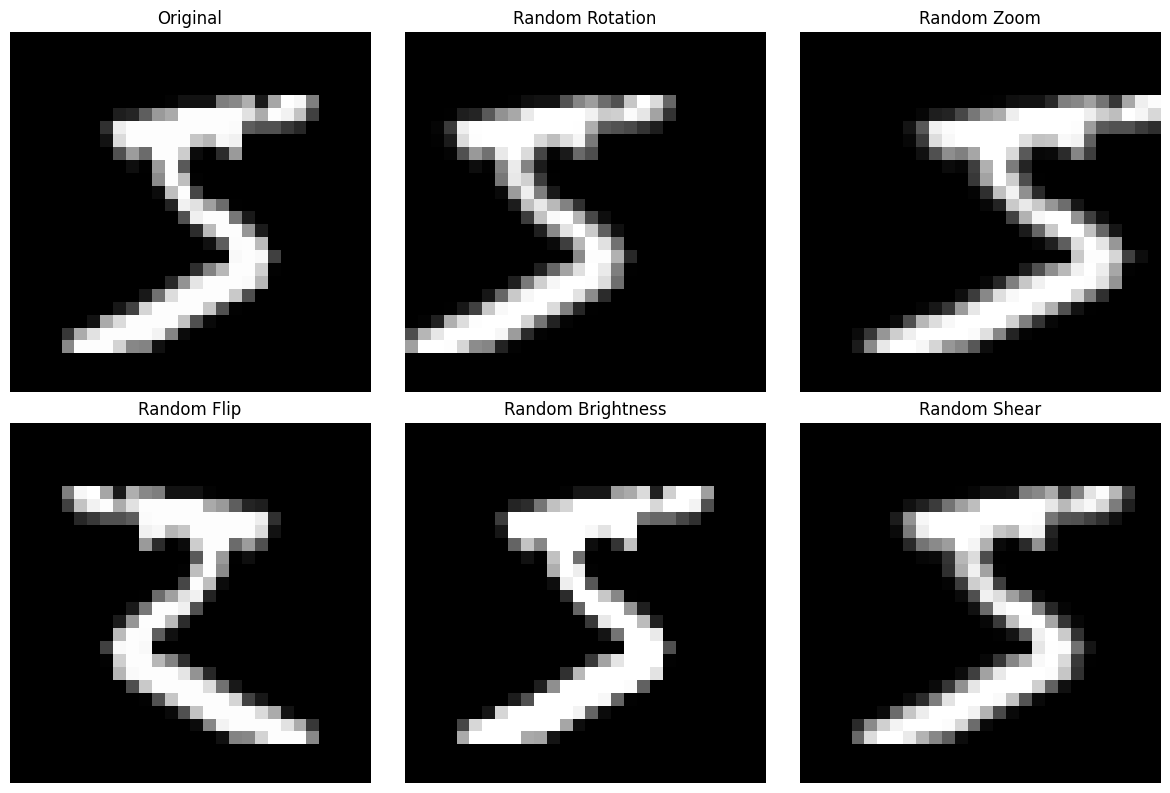

In [9]:
#Applying Augumentations and visualizing
# Define augmentation methods
augmentation_methods = {
    "Original": lambda x: x,
    "Random Rotation": random_rotation,
    "Random Zoom": random_zoom,
    "Random Flip": random_flip,
    "Random Brightness": random_brightness,
    "Random Shear": random_shear,
}


plt.figure(figsize=(12, 8))

for i, (title, aug_fn) in enumerate(augmentation_methods.items()):
    augmented_image = aug_fn(sample_image)
    plt.subplot(2, 3, i + 1)
    plt.imshow(tf.squeeze(augmented_image), cmap="gray")
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.show()
